<h1>Kapitel 1 - Deskriptiv statistik </h1>
Vi kommer här gå igenom hur vi med hjälp av NumPy och SciPy kan räkna ut några av de grundläggande statistikmåtten vi gått igenom i kapitel 1.<br>
Vi börjar med att importera de paket vi behöver.<br>
Vi importerar också ett dataset som vi skall börja bekanta oss med, penguins.csv. Det innehåller mätdata på tre olika pingvinarter, insamlade på tre olika öar i Antarktis. En länk till den här datans distributör hittar du på skaparen Allison Horsts <a href=https://github.com/allisonhorst/palmerpenguins/blob/main/README.md>GitHub-sida</a>.

In [ ]:
#importera paket
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs 
import seaborn as sns 
    
# importera palmer penguins
filepath = 'c:/users/davber/Python/notebooks/data/penguins.csv'
penguins = pd.read_csv(filepath)
penguins = penguins.dropna() # Plocka bort rader som innehåller NaN

In [2]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


<h2>Lägesmått eller mått på centraltendens</h2>

<h3>Typvärde</h3>

<strong>Typvärdet</strong> för en datamängd är det vanligast förekommande värdet i datamängden.

<strong>Exempel:</strong> Vad är typvärdet för datamängden {Röd, Röd, Gul, Grön}?

Typvärdet kan beräknas enkelt direkt i Pandas genom funktionen <code>mode()</code>

In [3]:
penguins['island'].mode() # Beräkna typvärdet med Pandas

0    Biscoe
Name: island, dtype: object

Alternativt kan vi också använda oss av <code>value_counts()</code> för att få frekvensen av alla förekommande värden i vår datamängd. Default här är att sortera på storlek, vilket per automatik då också ger oss typvärdet.

In [4]:
penguins['island'].value_counts() # Beräkna typvärdet med NumPy

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

<h3>Median</h3>

<strong>Medianen</strong> för en datamängd är det värde som hamnar "i mitten" om värdena ordnas efter storlek.

<strong>Exempel:</strong> Vad är medianen för datamängden ${8, 3, 6, 7, 9}$?<br>
Lösning: I storleksordning: $3,6,7,8,9$ så medianen är $7$.

<strong>Exempel:</strong> Vad är medianen för datamängden ${8, 3, 7, 9}$?<br>
Lösning: I storleksordning: $3,7,8,9$ så medianen är medelvärdet av $7$ och $8$, alltså $7.5$

Medianen kan beräknas direkt i Pandas med funktionen <code>median()</code>. Låt oss beräkna medianen av näbblängden (bill_length_mm).

In [5]:
penguins['bill_length_mm'].median() # Beräkna medianen med Pandas

44.5

Vi kan också göra det med NumPy:s funktion <code>median()</code>.

In [6]:
np.median(penguins['bill_length_mm']) # Beräkna medianen med NumPy

44.5

<h3>Medelvärde</h3>

<strong>Medelvärdet</strong> för en datamängd är "snittet", alltså summan av alla värden dividerat med hur många värden som finns i datamängden.
<h3>
   ${\bar x}=\frac{1}{n}\sum_{i=1}^{n}x_i=\frac{x_1+\dots+x_n}{n}$
</h3>

<strong>Exempel:</strong> Vad är medelvärdet för datamängden ${8, 3, 6, 7, 9}$?<br>
Lösning: Insättning av data i formeln för medelvärde ger:<h4>$\frac{8+3+6+7+9}{5}=\frac{33}{5}=6.6$</h4>

Precis som med tidigare mått har Pandas en funktion för medelvärde, <code>mean()</code>

In [7]:
penguins['bill_length_mm'].mean() # Beräkna medelvärdet med Pandas

43.9927927927928

Vi kan också göra det med NumPy:s funktion <code>mean()</code>

In [8]:
np.mean(penguins['bill_length_mm']) # Beräkna medelvärdet med NumPy

43.9927927927928

<strong>Reflektion:</strong> Kan man räkna typvärden, medianer och medelvärden för alla datatyper?

<h2>Spridningsmått</h2>

<h3>Varians</h3>

<strong>Variansen</strong> för ett stickprov ges av:
    <h3>
    $\,\,\,\,\,\,\,\,\,s^2=\frac{1}{n-1}\sum_{i=1}^{n}\left(x_i-{\bar x}\right)^2=\frac{1}{n-1}\left(\sum_{i=1}^{n}x_i^2-n\left({\bar x}\right)^2\right)$
    </h3>

<strong>Exempel:</strong> Vad är variansen för stickprovet $8, 3, 7, 9$?<br>
Lösning: Medelvärdet är $6.75$ så vi får att variansen är:</h3>
    <h4>
    $\frac{1}{4-1}\left(8^2+3^2+7^2+9^2-4\cdot 6.75^2\right)\approx 6.9$
    </h4>

Varians kan beräknas i Pandas med funktionen <code>var()</code>. Vad är stickprovsvariansen av näbblängd (bill_length_mm) i datamängden 'penguins'?

In [9]:
penguins['bill_length_mm'].var() # Beräkna variansen med Pandas

29.90633344187561

<strong>Reflektion:</strong> Vilken enhet får variansen i det här exemplet?

Även NumPy har en funktion <code>var()</code> för varians. Här gäller dock att vara försiktig. Varians kan beräknas på olika sätt beroende på var datan kommer från. <br><br>
Vi använder oss av $n-1$ frihetsgrader när vi räknar på stickprov (samples), och $n$ frihetsgrader när vi räknar på populationer. I praktiken är det nästan aldrig möjligt att räkna på populationer, därför kommer formeln $n-1$ vara den överlägset vanligaste vi stöter på. <br><br>
I NumPy används som standard att antalet <i>frihetsgrader</i> är 0. I Pandas är antalet frihetsgrader per default 1. För att få samma värde på variansen i NumPy måste vi alltså lägga till ett argument: <code>ddof=1</code>. ddof i det här sammanhanget står för 'delta degrees of freedom'.

In [10]:
np.var(penguins['bill_length_mm'],ddof=1) # Beräkna variansen med NumPy

29.90633344187561

<h3>Standardavvikelse</h3>

<strong>Standardavvikelsen</strong> är roten ur variansen:
<h3>
    $s=\sqrt{s^2}$
    </h3>

Pandas har även här en inbyggd funktion för standardavvikelse <code>std()</code>. Låt oss fortsätta räkna på näbblängden.

In [11]:
penguins['bill_length_mm'].std() # Beräkna standardavvikelse med Pandas

5.46866834264756

Här kan vi dubbelkolla så att det stämmer överens med vår tidigare uträkning av variansen.

In [12]:
np.sqrt(29.9)

5.468089245796926

I NumPy gäller samma sak som för variansen. Det finns en funktion <code>std()</code>, men vi måste lägga med argumentet <code>ddof=1</code> för att erhålla samma resultat som i Pandas.

In [13]:
np.std(penguins['bill_length_mm'],ddof=1) # Beräkna standardavvikelse med NumPy

5.46866834264756

<h3>All together now!</h3>

Pandas har en praktisk funktion som heter <code>describe()</code> där vi snabbt får ut flera av de mått vi pratat om.

In [16]:
penguins['bill_length_mm'].describe() # Beräkna deskriptiva mått i Pandas.

count    333.000000
mean      43.992793
std        5.468668
min       32.100000
25%       39.500000
50%       44.500000
75%       48.600000
max       59.600000
Name: bill_length_mm, dtype: float64

<strong>Reflektion:</strong> Var hittar vi medianen?

<h3>Medelabsolutavvikelse - MAD</h3>

<strong>Medelabsolutavvikelsen</strong> för en datamängd ges av:
    <h3>
    $\,\,\,\,\,\,\,\,\,MAD=\frac{1}{n}\sum_{i=1}^{n}\lvert x_i - {\bar x}\rvert$
    </h3>

<strong>Exempel:</strong> Vad är MAD för datamängden ${8, 3, 7, 9}$?

Lösning: Medelvärdet är 6.75 så vi får att MAD är:
    <h3>
    $\frac{1}{4}\left(\lvert 8 - 6.75 \rvert + \lvert 3 - 6.75 \rvert + \lvert 7 - 6.75 \rvert + \lvert 9 - 6.75 \rvert\right)
    =\frac{1.25+3.75+0.25+2.25}{4}\approx 1.9$
    </h3>

MAD kan beräknas med Pandas genom funktionen <code>mad()</code>

In [14]:
penguins['bill_length_mm'].mad() # Beräkna MAD med Pandas

C:\Users\davber\AppData\Local\Temp\ipykernel_26204\1831857476.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  penguins['bill_length_mm'].mad() # Beräkna MAD med Pandas


4.720314909504098

Hoppsan! Här får vi ett meddelande som varnar oss för att funktionen <code>mad()</code> kommer försvinna ur Pandas, men med ett exempel på hur den kan räknas ut ändå.

In [15]:
(penguins['bill_length_mm'] - penguins['bill_length_mm'].mean()).abs().mean() # 'Hårdkodad' version för MAD.

4.720314909504098

<h3>Snedhet</h3>
<h5>Eng: Skewness</h5>
Snedhet är ett mått på hur assymetrisk datamängden är. Snedheten beräknas enligt:
    <h2>
    $\,\,\,\,\,\,\,\,\,\sum_{i=1}^{n}\left(\frac{x_i-{\bar x}}{s}\right)^3$
    </h2><br>
Snedheten blir negativ om fördelningen är skev åt vänster och positivt om fördelningen är skev åt höger

Låt oss göra ett histogram över kroppsvikten för alla pingviner i vårt dataset. 

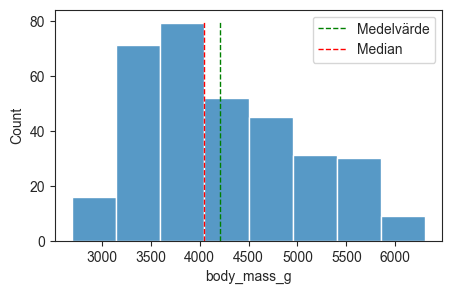

In [30]:
### Grundplot
fig, ax = plt.subplots(figsize=(5,3))
sns.histplot(penguins, x='body_mass_g', bins=8); # Plotta 'body_mass_g' som histogram med 8 bins

### Medelvärde och median
mass_mean = penguins['body_mass_g'].mean() # Beräkna medelvärde för 'body_mass_g'
mass_median = penguins['body_mass_g'].median() # Beräkna medianvärde för 'body_mass_g'
plt.plot([mass_mean, mass_mean], [0, 80], color='green', linestyle='--', linewidth=1, label='Medelvärde') # Plotta medelvärde för 'body_mass_g' med streckad grön linje
plt.plot([mass_median, mass_median], [0, 80], color='red', linestyle='--', linewidth=1, label='Median') # Plotta medianvärde för 'body_mass_g' med streckad röd linje

### Legend
leg = plt.legend(loc='upper right') # Rita legend för medelvärde och median i övre högra hörnet
plt.show()

Ett grafisk sätt att undersöka skevheten är att jämföra medelvärdet med medianen. Om medelvärdet är större än medianen så är fördelningen skev åt höger. Vice versa, om medelvärdet är mindre än medianen är fördelningen skev åt vänster. För vår data över kroppsvikter ovan är medelvärdet större än medianen. Fördelningen är alltså skev åt höger, och borde alltså ha ett positivt värde på skevheten.

Vi räknar ut skevheten för en datamängd i Pandas med hjälp av <code>skew()</code>

In [18]:
penguins['body_mass_g'].skew() # Beräkna skevhet med Pandas

0.4722460732964027

Samma beräkning går att göra i SciPy med <code>skew()</code>

In [19]:
scs.skew(penguins['body_mass_g']) # Beräkna skevhet med SciPy

0.4701161714183821

Här är uppenbarligen något som gör beräkningen annorlunda i SciPy jmf med Pandas. Det handlar återigen om att SciPy, liket NumPu, räknar som om det vore populationsdata. Vi kan korrigera detta, vilket görs per default i Pandas, men inte i SciPy. Därför lägger vi till ett argument <code>bias=False</code>, för att erhålla samma värde som i Pandasberäkningen.

In [20]:
scs.skew(penguins['body_mass_g'], bias=False) # Beräkna bias-korrigerad skevhet med SciPy

0.47224607329640284